# Logistic regression with the Pima Diabetes dataset

References:
* https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

In [8]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [23]:
def load_dataset() -> (pd.DataFrame, pd.DataFrame):
    # From diabetes dataset of Scikit-Learn
    X = pd.DataFrame(load_diabetes()["data"],columns=load_diabetes()["feature_names"])
    y = pd.DataFrame(load_diabetes()["target"],columns=["target"])
    X = X.dropna()
    y = y.dropna()

    # The dataset's metadata said that the features are scaled, hence sex has float values
    # Let's convert them back to categorical values
    X.loc[X["sex"]>0, "sex"] = 1
    X.loc[X["sex"]<0, "sex"] = 0
    data = pd.concat([X, y], axis=1)
    # Get categorical labels
    data['diabetes'] = (data['target'] > 180).astype(int)

    y = pd.DataFrame(data['diabetes'], columns=["diabetes"])

    return X, y, data

In [24]:
X, y, data = load_dataset()
print(data)

          age  sex       bmi        bp        s1        s2        s3  \
0    0.038076  1.0  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882  0.0 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  1.0  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063  0.0 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383  0.0 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...  ...       ...       ...       ...       ...       ...   
437  0.041708  1.0  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  1.0 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  1.0 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472  0.0  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472  0.0 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  diabetes  
0   -0.002592  0.019907 -0.017646   151.0         0  
1   -0.039493 -0.068332 -0.

### Exploratory data analysis (EDA)

#### Class distribution

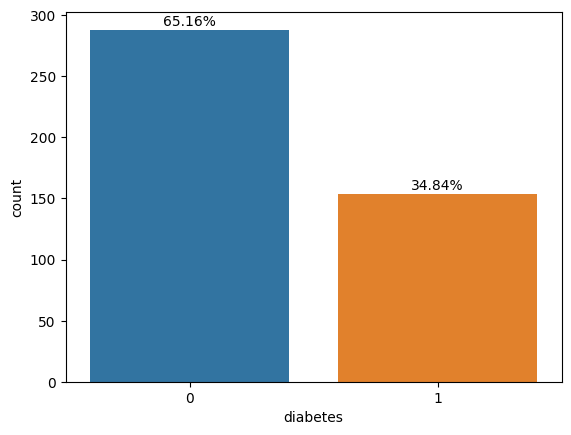

In [19]:
splot = sns.countplot(x='diabetes', data=data)
for p in splot.patches:
    splot.annotate("{:.2f}%".format(p.get_height() / data.shape[0] * 100), 
                   (p.get_x() + p.get_width() / 2., p.get_height() - 5),  
                   ha='center', 
                   va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
plt.show()

There are more samples of people with no diabetes than people with diabetes.

In [25]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.450978
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: diabetes         Pseudo R-squared: 0.302     
Date:               2024-01-10 12:58 AIC:              418.6649  
No. Observations:   442              BIC:              459.5780  
Df Model:           9                Log-Likelihood:   -199.33   
Df Residuals:       432              LL-Null:          -285.74   
Converged:          1.0000           LLR p-value:      1.6052e-32
No. Iterations:     7.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
age      -1.4794     2.9057   -0.5091   0.6107    -7.1745    4.2157
sex      -1.4304     0.2246   -6.3700   0.0000    -1.8705 

The p-values > 0.05 for **sex, bmi, bp and s5**, so we will remove them because we failed to reject the null hypothesis that these variables are not important.

### Applying Logistic Regression

In [81]:
important_features = ['age', 's1', 's2', 's3', 's4', 's6']

In [94]:
X_important_feats = X[important_features]
X_train, X_test, y_train, y_test = train_test_split(X_important_feats, y, test_size=0.3, random_state=0)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [95]:
y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


     diabetes
362         1
249         1
271         0
435         0
400         0
..        ...
328         0
414         0
421         1
361         1
415         0

[133 rows x 1 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[90  0]
 [42  1]]


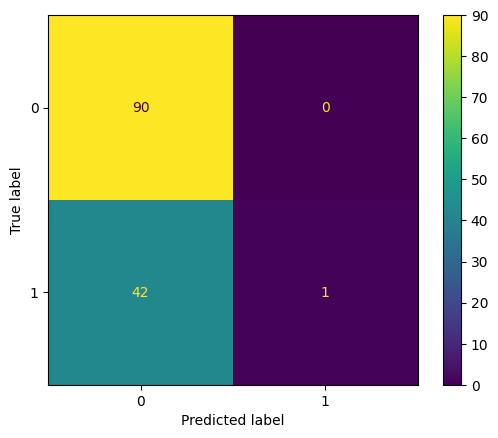

In [84]:
print(y_test)
print(y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

These results are really bad, it labeled almost every sample as 0:
* TP = 1
* TN = 90
* FP = 0
* FN = 42

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        90
           1       1.00      0.02      0.05        43

    accuracy                           0.68       133
   macro avg       0.84      0.51      0.43       133
weighted avg       0.78      0.68      0.56       133



* The model got 68% precision and 100% recall on the non diabetes cases.
* The model got 100% precision and 2% recall on the diabetes cases.

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [88]:
def roc_curve_plot(X_test, y_test, log_reg):
    logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

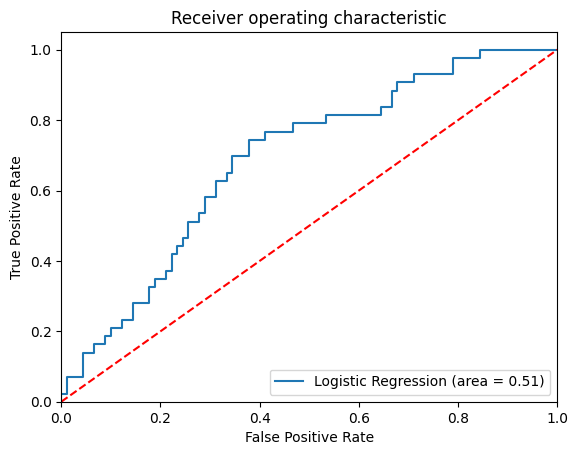

In [89]:
roc_curve_plot(X_test, y_test, log_reg)

In [110]:
def logistic_regression_plot(X_test, y_test):
    data = pd.DataFrame({'x': X_test['s6'], 'y': y_test['diabetes']})
    sns.regplot(x=data.x, y=data.y, data=data, logistic=True, ci=None)

          age        s1        s2        s3        s4        s6
362  0.019913 -0.035968 -0.026679 -0.024993 -0.002592  0.040343
249 -0.012780  0.047965  0.029375 -0.017629  0.034309  0.007207
271  0.038076 -0.042848 -0.021042 -0.039719 -0.002592  0.007207
435 -0.012780 -0.016704  0.004636 -0.017629 -0.002592 -0.038357
400 -0.023677 -0.018080 -0.035447  0.070730 -0.039493 -0.009362
..        ...       ...       ...       ...       ...       ...
328 -0.038207 -0.029088 -0.023234 -0.010266 -0.002592  0.019633
414  0.081666  0.109883  0.117056 -0.032356  0.091875  0.007207
421  0.038076  0.039710  0.045032 -0.043401  0.071210  0.015491
361  0.041708 -0.042848 -0.048286  0.052322 -0.076395  0.023775
415 -0.005515  0.025950  0.047224 -0.043401  0.071210  0.003064

[133 rows x 6 columns]
     diabetes
362         1
249         1
271         0
435         0
400         0
..        ...
328         0
414         0
421         1
361         1
415         0

[133 rows x 1 columns]
[0 0 0 0 0 0 0 0

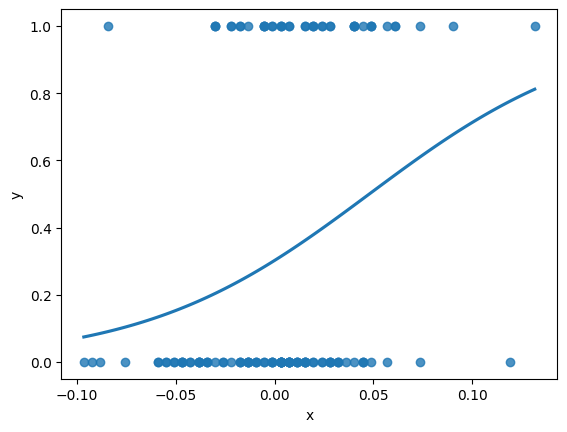

In [111]:
print(X_test)
print(y_test)
print(y_pred)
logistic_regression_plot(X_test, y_test)

I can assume that Logistic Regression is not a good fit for this dataset.